In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📊 Step 2: Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 🔀 Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌳 Step 4: Build a simple Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 🎯 Step 5: Evaluate Initial Model
y_pred = model.predict(X_test)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


🔲 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [3]:
# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("\n⚙️ Cross-Validation Scores:", scores)
print("🔎 Average Cross-Validation Score:", scores.mean())



⚙️ Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
🔎 Average Cross-Validation Score: 0.9533333333333334


In [5]:
# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("\n✅ Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\n🎯 Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\n📊 Tuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))



✅ Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

🎯 Tuned Model Accuracy: 1.0

📊 Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



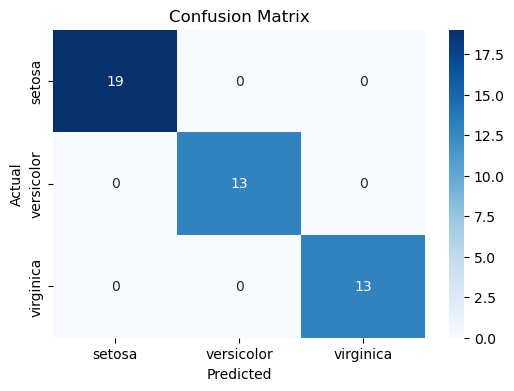

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


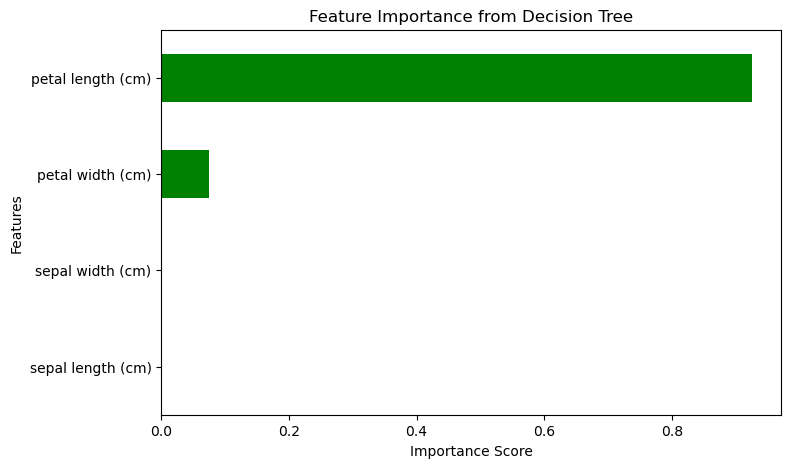

In [9]:
# Plot feature importances
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='green')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


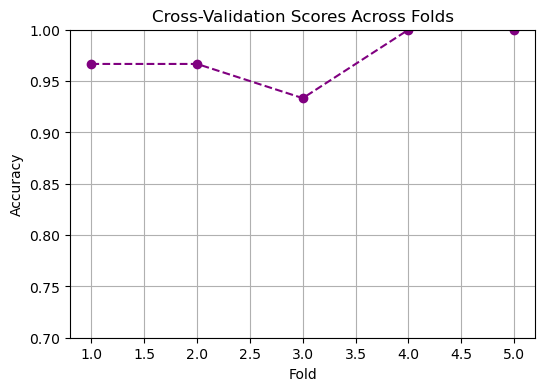

In [10]:
# Run cross-validation again for plotting
cv_scores = cross_val_score(best_model, X, y, cv=5)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.title('Cross-Validation Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.show()
